<a href="https://colab.research.google.com/github/Alishba01234/PAI_PROJECT/blob/main/PAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
# uploaded = files.upload()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pesticides_df = pd.read_excel('pesticidesData.xls', usecols=range(16))
df = pesticides_df.copy()
df.head()

,S.No.,R.No.,Date,Job No.,Firm Name,Brand Name,Common Name,Formulation,Quantity (lit/kg),C & F Value,Ex.Rate (US$),Total Value (Rs.),Origin,Reg.No.,PSI,Category
0,1.0,2.0,"02-January,2017",C/PK/QC16015,Exin Chemicals,Xiaowang,Mesotrione + Atrazine,55% soluble concentration,16000.0,3.30,106,5596800.0,China,R-1912,NMCI,Herb.
1,2.0,2.0,"02-January,2017",C/S/PK/170059/16,New Agri Care,Deft,Metsulfuron Methyl,10% waightable powder,2000.0,3.37,106,714440.0,China,R-908,NMCI,Herb.
2,3.0,1.0,"02-January,2017",CU16119148,Tara Imperial Industries,NaN,Glyphosate,41% soluble liquid,32000.0,1.78,106,6037760.0,China,R-6945,CU,Herb.
3,4.0,4.0,"02-January,2017",CU16119110,Tara Imperial Industries,NaN,Metalaxyl + Mancozeb,72% waightable powder,15000.0,3.60,106,5724000.0,China,R-4982,CU,Fungicide
4,5.0,4.0,"03-January,2017",PK-130617/16,Sun Crop Pesticides,Truce Xtra,Mesotrione + Atrazine,88.8% weightable granulers,1000.0,8.50,106,901000.0,China,R-1983,NMCI,Herb.


In [4]:
df['Total Value (Rs.)'] = df['Quantity (lit/kg)']*df['C & F Value']*df['Ex.Rate (US$)']

In [5]:
df.drop(columns=['S.No.','R.No.','Ex.Rate (US$)'],inplace=True)
df['Brand Name'].fillna("Form-16",inplace=True)

/tmp/ipython-input-340924966.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Brand Name'].fillna("Form-16",inplace=True)


In [6]:
from dateutil import parser

def parse_messy_date(date_str):
    try:
        parsed_date = parser.parse(date_str, dayfirst=True, fuzzy=True)
        return parsed_date.strftime('%Y-%m-%d')
    except (ValueError, TypeError):
        return np.nan

df['Date'] = df['Date'].apply(parse_messy_date)

In [7]:
pd.set_option('display.max_rows', None)
df['Formulation'].value_counts()

,count
Formulation,
80% weightable granulers,133
25% waightable powder,129
15% waightable powder,67
72% waightable powder,64
70% waightable powder,52
75% soluble powder,49
20% soluble liquid,44
55% soluble concentration,41
55% soluble concentration,40


In [8]:
import re

# Regex to match either:
# 1. number (with optional %) at the start, then type
# 2. OR type at the start, number at the end
pattern = r"""
    ^\s*
    (?:
        (?P<Percentage1>\d+(?:\.\d+)?)       # number at start
        (?:%)?                               # optional %
        \s*(?P<Type1>.+)                     # type after number
    |
        (?P<Type2>[A-Za-z\s]+)               # type at start
        \s*(?P<Percentage2>\d+(?:\.\d+)?)    # number at end
    )
    \s*$
"""

extracted = df['Formulation'].str.extract(pattern, flags=re.VERBOSE)

df['Percentage'] = extracted['Percentage1'].combine_first(extracted['Percentage2'])
df['Type'] = extracted['Type1'].combine_first(extracted['Type2'])

df['Percentage'] = pd.to_numeric(df['Percentage'], errors='coerce')
df['Type'] = df['Type'].str.strip()

df.dropna(subset=['Percentage','Type'],inplace=True)

In [9]:
df['Percentage'].value_counts(ascending=False).sort_index(ascending=True)

,count
Percentage,
0.02,1
0.40,1
0.50,21
1.80,11
1.90,14
2.00,1
2.50,6
3.00,7
3.60,3


In [10]:
df['Type'].value_counts(ascending=False).sort_index(ascending=True)

,count
Type,
% emulsifier concentration,1
(ALP),6
(ALP) Tab,1
(ALP) Tablets,1
(g/l),4
(g/l) CS,2
(g/l) SE,1
(g/l) soluble concentration,3
(g/l) soluble liquid,2


In [11]:
df['Type'] = (
    df['Type']
    .astype(str)
    .str.strip()
    .str.upper()
    .str.replace(r'[%()+/]', ' ', regex=True)
    .str.replace(r'[^A-Z0-9\s]', '', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
)

replace_map = {
    'ALP': 'ALP TABLETS',
    'ALP TAB': 'ALP TABLETS',
    'TAB': 'TABLETS',
    'TABLET': 'ALP TABLETS',
    'TABLETS': 'ALP TABLETS',
    'WP': 'WAIGHTABLE POWDER',
    'WDG 20 60': 'WDG',
    'WS': 'WATER SOLUBLE POWDER',
    'WSOLUBLE POWDER': 'WATER SOLUBLE POWDER',
    'SOLUBLE POWDER': 'WATER SOLUBLE POWDER',
    'SC': 'SOLUBLE CONCENTRATE',
    'OF': 'OIL FORMULATION',
    'OD': 'OIL DISPERSION',
    'EW': 'EMULSION, OIL IN WATER',
    'EC': 'EMULSIFIABLE CONCENTRATE',
    'EMULSIFIER CONCENTRATION': 'EMULSIFIABLE CONCENTRATE',
    'EMULSION CONCENTRATION': 'EMULSIFIABLE CONCENTRATE',
    'DF': 'DRY FLOWABLE',
    'ME': 'MICRO EMULSION',
    'G L CS': 'GRAMS PER LITRE SOLUBLE CONCENTRATE',
    'G L SOLUBLE CONCENTRATION': 'GRAMS PER LITRE SOLUBLE CONCENTRATE',
    'G L SOLUBLE LIQUID': 'GRAMS PER LITRE SOLUBLE LIQUID',
    'G L SE': 'GRAMS PER LITRE SUSPENSION EMULSION',
    'G/L': 'GRAMS PER LITRE',
    'GL': 'GRAMS PER LITRE',
    'G L': 'GRAMS PER LITRE',
    'SOLUBLE CONCENTRATION': 'SOLUBLE CONCENTRATE',
    'ZC': 'MIXED FORMULATION (ZC)',
    'AS': 'AQUEOUS SOLUTION',
    'SE': 'SUSPENSION EMULSION',
    'SG': 'SOLUBLE GRANULES',
    'KPP': 'KILOGRAMS PER PACK',
    'CF': 'CONTROL FORMULATION',
    'EO': 'EMULSION, OIL IN WATER',
    'G': 'GRAMS PER LITRE',
    'W W': 'WEIGHT BY WEIGHT',
    'W W PERCENTAGE': 'WEIGHT BY WEIGHT',
    '+2': '2% CHLOROPICRIN',
    '2': '2% CHLOROPICRIN',
    '2 PERCENT': '2% CHLOROPICRIN',
    '2 CHLOROPICRIN': '2% CHLOROPICRIN',
    'PLATES STRIPS': 'PLATES',
}

# Normalize using replacement dictionary
df['Type'] = df['Type'].replace(replace_map)
df['Type'].value_counts(ascending=False).sort_index(ascending=True)

,count
Type,
2% CHLOROPICRIN,9
ALP TABLETS,21
AQUEOUS SOLUTION,21
CONCENTRATE BAIT,1
CONTROL FORMULATION,3
DRY FLOWABLE,6
EMULSIFIABLE CONCENTRATE,215
"EMULSION, OIL IN WATER",5
FLOWABLE SUSPENSION,11


In [12]:
df = df.drop('Formulation', axis=1)

In [13]:
df = df.rename(columns={
    'Common Name': 'Composition'
})

In [14]:
df['Category'].value_counts()

,count
Category,
Herb.,500
Insect.,429
Fung.,274
Fungicide,202
Insect,79
Fumigant,31
Biological,21
Fum.,3
Insecticide,2


In [15]:
category_mapping = {
    'Herb.': 'Herbicide',
    'Fung.': 'Fungicide',
    'Insect.': 'Insecticide',
    'Insect': 'Insecticide',
    'Fumigation': 'Fumigant',
    'Fum.': 'Fumigant',
    'Acari': 'Acaricide',
    'Acaracide': 'Acaricide',
    'Acracide': 'Acaricide',
}

In [16]:
df['Category'] = df['Category'].replace(category_mapping)

In [17]:
df['Category'].value_counts()

,count
Category,
Insecticide,510
Herbicide,500
Fungicide,476
Fumigant,35
Biological,21
Acaricide,3


In [18]:
import re

def normalize_firm_name(name):
    if not isinstance(name, str):
        return ""

    name = name.upper()
    name = re.sub(r'[^\w\s]', '', name)
    name = re.sub(r'\s+', ' ', name).strip()

    replacements = {
        'PRIVATE LIMITED': '', 'PVT LTD': '', 'LTD': '', 'LIMITED': '', 'PVT': '',
        'ENTERPRISES': 'ENTERPRISE',
        'ENTREPRENUER': 'ENTREPRENEUR',
        'ENTERPRENEUR': 'ENTREPRENEUR',
        'ENTREPRENEUR': 'ENTERPRISE',
        'CHEMCIALS': 'CHEMICALS',
        'CHEMICALES': 'CHEMICALS',
        'CHEMICALS': 'CHEMICAL',
        'PESTICIDES': 'PESTICIDE',
        'PESTISIDE': 'PESTICIDE',
        'SCIENCES': 'SCIENCE',
        'LIFESCIENCE': 'LIFE SCIENCE',
        'AGROSCIENCE': 'AGRO SCIENCE',
        'AGROSCIENCES': 'AGRO SCIENCE',
        'SERVICES': 'SERVICE',
        'DISTRIBUTERS': 'DISTRIBUTORS',
        'DISTRIBUTION': 'DISTRIBUTORS',
        'CENTER': 'CENTRE',
        'CORP': 'CORPORATION',
        'CORPORATIONORATION': 'CORPORATION',
        'ALNOOR': 'AL NOOR',
        'AGROTREE': 'AGRO TREE',
        'AGROCHINA': 'AGRO CHINA',
        'RICECO': 'RICE CO',
        'WELCOM AGRO': 'WELCOME AGRO',
        'WELCOME AGRO CHEMICAL': 'WELCOME AGRO',
        'WELCOME CHEMICAL': 'WELCOME AGRO',
        'WELCON AGRO CHEMICAL': 'WELCOME AGRO',
        'WELCON CHEMICAL': 'WELCOME AGRO',
        'WELCONE CHEMICAL': 'WELCOME AGRO',
        ' KARACHI': '',
        'PAKISTAN': '',
        'INDUSTRIES': '',
        'STEDECT': 'STEDEC',
        'CORPORATION': '',
        'FOR': '4',
        'R B': 'RB',
        'SERVICE': '',
        'SCIENCE': '',
        'BIOLOGIC AG': 'AGRI',
        'FOURBROTHERS': 'FOURBROTHER',
        'FMC': 'FM',
        'S ESSA': 'SESSA',
    }

    for old, new in replacements.items():
        name = name.replace(old, new)

    name = re.sub(r'\s+', ' ', name).strip()

    return name

df['Firm Name'] = df['Firm Name'].apply(normalize_firm_name)

In [19]:
manual_firm_map = {
    'ABDULLAH HASEEB': 'ABDULLAH HASEEB AGRO CHEMICAL',
    'AGGRIO':'AGGRIO CHEMICAL',
    'AGRI 4CE': 'AGRI 4CE CHEMICAL',
    'AGRO': 'AGRO TREE LIFE',
    'AGROW': 'AGROW MARK',
    'AJMA CHEM': 'AJMA CHEMICAL',
    'AGRO CHEMICAL': 'AL NOOR AGRO CHEMICAL',
    'ARYSTA LIFE SCIENE': 'ARYSTA LIFE',
    'AURIGA CHEMICAL ENTERPRISE': 'AURIGA CHEMICAL',
    'CAPRICORN': 'CAPRICORN ASSOCIATIONS',
    'COMMANDER AGRO CHEMICAL': 'COMMANDER AGRO',
    'DU PONT OPERATIONS': 'DUPONT',
    'DUPENT OPERATION': 'DUPONT',
    'FOURBROTHER AGRI': 'FOURBROTHER BIOLOGIC',
    'FOURBROTHERBIOLOGIC': 'FOURBROTHER BIOLOGIC',
    'HELB AGRO CHEMICAL': 'HELB AGRO',
    'HELB PESTICIDE CHEMICAL': 'HELB PESTICIDE',
    'HEXTAR CHEMICAL ENTERPRISE': 'HEXTAR CHEMICAL',
    'NAFEES ENTERPRENUER': 'NAFEES ENTERPRISE',
    'PRIME BIOLOGICAL': 'PRIME BIOLOGICAL ENTERPRISE',
}

manual_firm_map_normalized = {normalize_firm_name(k): v for k, v in manual_firm_map.items()}

df['Firm Name'] = df['Firm Name'].replace(manual_firm_map_normalized)

In [20]:
df['Brand Name'].value_counts(ascending=False).sort_index(ascending=True)

,count
Brand Name,
Acelam,4
Acord,1
Acrid,1
Acrobat MZ,2
Actara,6
Actara ST,1
Adventure,1
Agroguard,1
Aiker,2


In [21]:
import pandas as pd

df['Brand Name'] = (
    df['Brand Name']
    .astype(str)
    .str.strip()
    .str.lower()
    .str.replace(r'[-_/]', ' ', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
    .str.title()
)

manual_map = {
    'Form 16': 'Form-16',
    'Ful Clear': 'Ful-Clear',
    'Ful Control': 'Ful-Control',
    'Ridomil Gold Mz': 'Ridomil Gold MZ',
    'Thiovet Jet': 'Thiovit Jet',
    'Kumulus Df': 'Kumulus-DF',
    'Kumulus D F': 'Kumulus-DF',
    'Liman Tian': 'Li Man Tian',
    'Hombre ': 'Hombre',
    'Defeater ': 'Defeater',
    'Sega Pest Clear': 'Sega',
    'Recado Xtra': 'Recado',
    'Hombre Excel': 'Hombre',
    'Double Star': 'Double',
    'Defeater Plus': 'Defeater',
    'Atlantis Super': 'Atlantis',
    'Actara St': 'Actara',
    'Segawin': 'Sega',
    'Romer': 'Romeo',
    'Core': 'Cure',
}
df['Brand Name'] = df['Brand Name'].replace(manual_map)
df['Brand Name'].value_counts(ascending=False).sort_index(ascending=True)

,count
Brand Name,
Acelam,4
Acord,1
Acrid,1
Acrobat Mz,2
Actara,7
Adventure,1
Agroguard,1
Aiker,2
Aimanli,1


In [22]:
df['Origin'].value_counts()

,count
Origin,
China,1039
India,297
Germany,59
USA,33
France,16
Indonesia,16
Denmark,15
Australia,13
Japan,12


In [23]:
origin_dict = {
    'Malysia': 'Malaysia',
    'England': 'UK',
    'Korea': 'South Korea',
    'Ausrtia': 'Austria',
    'Austalia': 'Australia',
}

df['Origin'].replace(origin_dict, inplace=True)
df['Origin'].value_counts()

/tmp/ipython-input-3762645648.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Origin'].replace(origin_dict, inplace=True)


,count
Origin,
China,1039
India,297
Germany,59
USA,33
France,16
Indonesia,16
Denmark,15
Australia,14
Japan,12


In [24]:
df['PSI'].value_counts()

,count
PSI,
CU,852
NMCI,458
BALTIC,83
Baltic,82
ICI,53
Cotecna,11
Japan,2
C.N,1
BALTIC Control,1


In [25]:
psi_dict = {
    'BALTIC Control': 'BALTIC',
    'Baltic': 'BALTIC',
}

df['PSI'].replace(psi_dict, inplace=True)
df['PSI'].value_counts()

/tmp/ipython-input-460777582.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PSI'].replace(psi_dict, inplace=True)


,count
PSI,
CU,852
NMCI,458
BALTIC,166
ICI,53
Cotecna,11
Japan,2
C.N,1
PIC,1
China,1


In [26]:
from sklearn.preprocessing import LabelEncoder

cols_to_encode = ['Firm Name', 'Brand Name', 'Type', 'Origin', 'PSI', 'Category']
encoders = {}

for col in cols_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

# Inverse transform later if needed
# df['Brand Name'] = encoders['Brand Name'].inverse_transform(df['Brand Name'])

<Axes: xlabel='Total Value (Rs.)', ylabel='Count'>

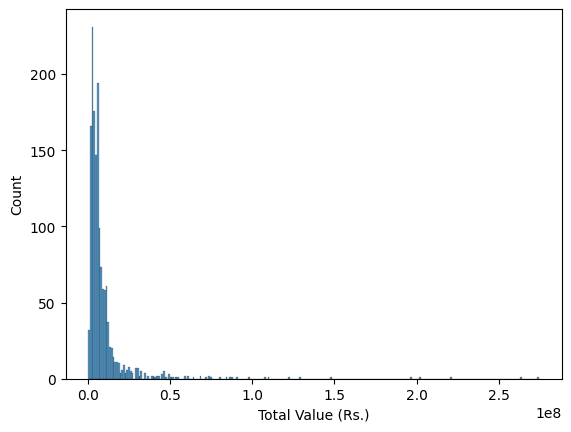

In [27]:
sns.histplot(df['Total Value (Rs.)'], cbar=False)

In [28]:
df.head()

,Date,Job No.,Firm Name,Brand Name,Composition,Quantity (lit/kg),C & F Value,Total Value (Rs.),Origin,Reg.No.,PSI,Category,Percentage,Type
0,2017-01-02,C/PK/QC16015,39,212,Mesotrione + Atrazine,16000.0,3.30,5596800.0,3,R-1912,7,4,55.0,19
1,2017-01-02,C/S/PK/170059/16,67,59,Metsulfuron Methyl,2000.0,3.37,714440.0,3,R-908,7,4,10.0,24
2,2017-01-02,CU16119148,99,77,Glyphosate,32000.0,1.78,6037760.0,3,R-6945,2,4,41.0,21
3,2017-01-02,CU16119110,99,77,Metalaxyl + Mancozeb,15000.0,3.60,5724000.0,3,R-4982,2,3,72.0,24
4,2017-01-03,PK-130617/16,95,196,Mesotrione + Atrazine,1000.0,8.50,901000.0,3,R-1983,7,4,88.8,28


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1545 entries, 0 to 1547
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1545 non-null   object 
 1   Job No.            1545 non-null   object 
 2   Firm Name          1545 non-null   int64  
 3   Brand Name         1545 non-null   int64  
 4   Composition        1545 non-null   object 
 5   Quantity (lit/kg)  1545 non-null   float64
 6   C & F Value        1545 non-null   float64
 7   Total Value (Rs.)  1545 non-null   float64
 8   Origin             1545 non-null   int64  
 9   Reg.No.            1545 non-null   object 
 10  PSI                1545 non-null   int64  
 11  Category           1545 non-null   int64  
 12  Percentage         1545 non-null   float64
 13  Type               1545 non-null   int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 213.3+ KB
